In [207]:
#load packages and set file paths.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [208]:
train = pd.read_csv('Training-Approval dataset.csv')
test = pd.read_csv('Testing.csv')
data = pd.concat([train,test])

print (train.shape, test.shape, data.shape)

((614, 13), (367, 15), (981, 15))


In [209]:
#we're working with a dataset with under 1000 samples.
#let's take a look at the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 15 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Ratio                367 non-null object
Self_Employed        926 non-null object
Tenure               367 non-null object
dtypes: float64(4), int64(1), object(10)
memory usage: 122.6+ KB


In [210]:
data.head()


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Ratio,Self_Employed,Tenure
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,NaN,No,NaN
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,NaN,No,NaN
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,NaN,Yes,NaN
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,NaN,No,NaN
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,NaN,No,NaN


In [211]:
data.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,NaN,NaN,NaN
50%,3800.000000,1110.000000,NaN,NaN,NaN
75%,5516.000000,2365.000000,NaN,NaN,NaN
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


In [212]:
#check the distribution of the target variable Loan_Status
train.Loan_Status.value_counts()

#68.7% of loans are approved by the company. [(422/614)*100=68.7%]

Y    422
N    192
Name: Loan_Status, dtype: int64

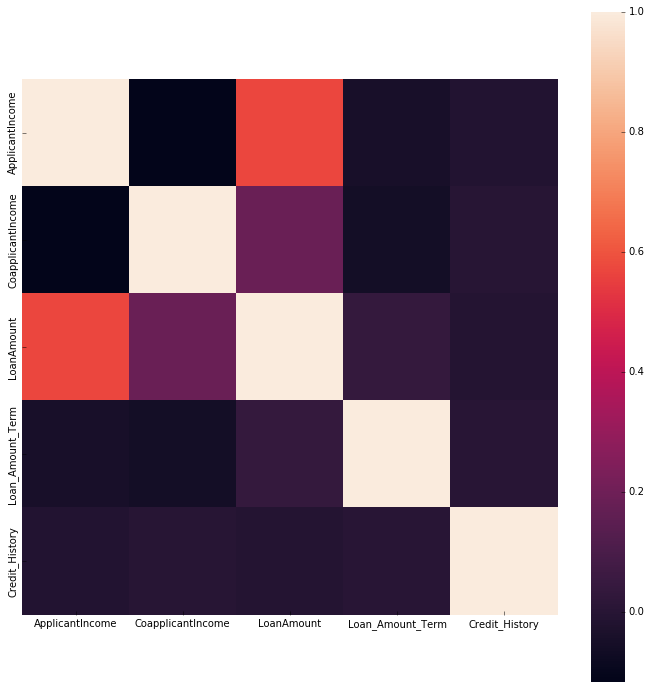

In [213]:
#check the correlation of the numerical feautres

corr = train.select_dtypes(include = ['float64', 'int64']).corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)
plt.show()

In [214]:
#check amount of unique values in data.
data.apply(lambda x: len(x.unique()))

ApplicantIncome      752
CoapplicantIncome    437
Credit_History         3
Dependents             5
Education              2
Gender                 3
LoanAmount           233
Loan_Amount_Term      13
Loan_ID              981
Loan_Status            3
Married                3
Property_Area          3
Ratio                181
Self_Employed          3
Tenure               164
dtype: int64

In [215]:
#check for NaNs.
data.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Ratio                614
Self_Employed         55
Tenure               614
dtype: int64

In [216]:
print (sum(train.Credit_History.isnull()), sum(test.Credit_History.isnull()))

(50, 29)


In [217]:
#We have 79 nulls in the Credit History column. They are spread between both
#the train and the test set. Let's change the column to a column of string
#type with values 'Yes', 'No', 'Unknown'.
train.Credit_History = train.Credit_History.fillna('Unknown')
test.Credit_History = test.Credit_History.fillna('Unknown')

In [218]:
print (sum(train.Dependents.isnull()), sum(test.Dependents.isnull()))

(15, 10)


In [219]:
#There are 25 nulls in the Dependents column. They are spread between both
#the train and the test set. Let's repeat the data tidying process we used on
#the Credit History column.

replace_dict = {'0':'0', '1':'1', '2':'2', '3+':'3'}

train.Dependents = train.Dependents.replace(replace_dict)
test.Dependents = test.Dependents.replace(replace_dict)
train.Dependents = train.Dependents.fillna('Unknown')
test.Dependents = test.Dependents.fillna('Unknown')

In [220]:
print (sum(train.Gender.isnull()), sum(test.Gender.isnull()))

(13, 11)


In [221]:
#There are 24 nulls in the Gender column. They are spread between both
#the train and the test set. Let's replace them with a string value again.

replace_dict = {'Male': '0', 'Female':'1'}

train.Gender = train.Gender.replace(replace_dict)
test.Gender = test.Gender.replace(replace_dict)
train.Gender = train.Gender.fillna('Unknown')
test.Gender = test.Gender.fillna('Unknown')

In [222]:
print (sum(train.Self_Employed.isnull()), sum(test.Self_Employed.isnull()))

(32, 23)


In [223]:
#There are 24 nulls in the Self_Employed column. They are spread between both
#the train and the test set. 
replace_dict = {'Yes':'1','No':'0'}

train.Self_Employed = train.Self_Employed.replace(replace_dict)
test.Self_Employed = test.Self_Employed.replace(replace_dict)
train.Self_Employed = train.Self_Employed.fillna('Unknown')
test.Self_Employed = test.Self_Employed.fillna('Unknown')

In [224]:
print (sum(train.Married.isnull()), sum(test.Married.isnull()))

(3, 0)


In [225]:
#There are 3 nulls in the Married column. Only the train set contains null values.
#This is not a problem. 
replace_dict = {'No':'0', 'Yes':'1'}

train.Married = train.Married.replace(replace_dict)
test.Married = test.Married.replace(replace_dict)
train.Married = train.Married.fillna('Unknown')

In [226]:
#Converting string values to integral values of "educated" column

replace_dict = {'Graduate':'1','Not Graduate': '0'}

train.Education = train.Education.replace(replace_dict)
test.Education = test.Education.replace(replace_dict)

In [227]:
#Converting string value to numerical values of "Property area" column

replace_dict = {'Urban':'0','Semiurban':'2','Rural':'1'}

train.Property_Area = train.Property_Area.replace(replace_dict)
test.Property_Area = test.Property_Area.replace(replace_dict)

In [228]:
print (sum(train.Loan_Amount_Term.isnull()), sum(test.Loan_Amount_Term.isnull()))

(14, 6)


In [229]:
#There are 20 nulls in the Loan_Amount_Term column. Replacing them with mean values
#for each differnt group (based on the categorical columns).

train.Loan_Amount_Term = train.groupby(['Gender', 'Dependents','Education','ApplicantIncome',
                                        'Married','Property_Area', 'Self_Employed']).Loan_Amount_Term.transform(
                                            lambda x: x.fillna(x.mean()))

test.Loan_Amount_Term = test.groupby(['Gender', 'Dependents','Education','ApplicantIncome',
                                        'Married','Property_Area', 'Self_Employed']).Loan_Amount_Term.transform(
                                            lambda x: x.fillna(x.mean()))

In [230]:
print (sum(train.LoanAmount.isnull()), sum(test.LoanAmount.isnull()))

(22, 5)


In [231]:
#There are also null values in the loan amount column. Repeat the process used above.

train.LoanAmount = train.groupby(['Gender', 'Dependents','Education','ApplicantIncome',
                                  'Married','Property_Area', 'Self_Employed']).LoanAmount.transform(
                                            lambda x: x.fillna(x.mean()))

test.LoanAmount = test.groupby(['Gender', 'Dependents','Education','ApplicantIncome',
                                'Married','Property_Area', 'Self_Employed']).LoanAmount.transform(
                                            lambda x: x.fillna(x.mean()))

In [232]:
inds = pd.isnull(train).any(1).nonzero()[0]
inds2 = pd.isnull(test).any(1).nonzero()[0]
print (inds, inds2)

(array([  0,  19,  35,  36,  44,  45,  63,  73,  81,  95, 102, 103, 112,
       113, 127, 165, 197, 202, 223, 232, 284, 305, 322, 335, 338, 367,
       387, 421, 423, 435, 437, 479, 524, 550, 551, 605], dtype=int64), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 1

In [233]:
#We can see that are still some NaNs left. Let's fill them in with the average
#for the column.

train.Loan_Amount_Term = train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean())
test.Loan_Amount_Term = test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mean())
train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean())
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean())

In [234]:
data = pd.concat([train, test])

data.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Ratio                614
Self_Employed          0
Tenure               614
dtype: int64

In [235]:
#Now the only null values in our data set are the target values we
#aim to predict. Let's save the train and test sets as separate CSV files and start
#a new python file.

train.to_csv('train2.csv', index=False)
test.to_csv('test2.csv', index=False)